In [1]:
import pandas

In [136]:
annotator1 = pandas.read_excel("Anon1Evaluation.xlsx", sheet_name=None)

In [137]:
annotator2 = pandas.read_excel("anon2evaluation.xlsx", sheet_name=None)

In [5]:
from sklearn.metrics import cohen_kappa_score as cks

In [15]:
annotator1.keys() == annotator2.keys()

True

dict_keys(['column_completeness_yago', 'column_completeness_nd_hungary', 'column_completeness_arco', 'column_completeness_zeri', 'column_completeness_nomisma', 'column_completeness_sari', 'column_completeness_europeana', 'column_completeness_dbpedia', 'column_completeness_wd'])

In [135]:
from statistics import mean
cohen_kappa_scores = dict()
column_comp_scores = dict()
for el in annotator1.keys():
    print(el)
    values1 = annotator1[el]["score"][0:100]
    valuesforavg1 = [float(val) for val in values1 if val != -1]
    column_comp_scores[el] = dict()
    column_comp_scores[el]["a1"] = mean(valuesforavg1)
    values1 = [int(val*100) for val in values1]
    print(set(values1))
    values2 = annotator2[el]["score"][0:100]
    valuesforavg2 = [float(val) for val in values2 if val != -1]
    column_comp_scores[el]["a2"] = mean(valuesforavg2)
    values2 = [int(val*100) for val in values2]
    
    print(set(values2))
    score = cks(values1, values2, weights="quadratic")
    print(score)
    cohen_kappa_scores[el] = score

column_completeness_yago
{33, 50, 100}
{33, 50, 100}
0.6538461538461539
column_completeness_nd_hungary
{0, 33, 66, 100, 50}
{0, 33, 66, 100, 50}
0.6274622665643388
column_completeness_arco
{0, 33, 66, 100, 50}
{0, 33, 66, 100, 50}
0.7696687370600415
column_completeness_zeri
{33, 50, 100, 66}
{33, 66, 100, 50}
0.7829131652661064
column_completeness_nomisma
{50}
{50}
nan
column_completeness_sari
{0, 33, 66, 100, 50}
{0, 33, 50, 100}
0.6779661016949152
column_completeness_europeana
{0, 33, 66, 100, 50, -100}
{0, 33, 66, 100, 50}
0.7522416234072675
column_completeness_dbpedia
{0, 33, 66, 100, 50}
{0, 33, 66, 100, 50}
0.6665913200723328
column_completeness_wikidata
{33, 66, 100, 50}
{33, 66, 100, 50}
0.9045497931912185


C:\Users\Bruno\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:641: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


In [53]:
column_comp_scores

{'column_completeness_yago': {'a1': 0.47333333333333333,
  'a2': 0.49666666666666665},
 'column_completeness_nd_hungary': {'a1': 0.5816666666666667, 'a2': 0.52},
 'column_completeness_arco': {'a1': 0.7383333333333333,
  'a2': 0.7416666666666667},
 'column_completeness_zeri': {'a1': 0.4983333333333333, 'a2': 0.525},
 'column_completeness_nomisma': {'a1': 0.5, 'a2': 0.5},
 'column_completeness_sari': {'a1': 0.5633333333333334,
  'a2': 0.29333333333333333},
 'column_completeness_europeana': {'a1': 0.23195876288659795, 'a2': 0.24},
 'column_completeness_dbpedia': {'a1': 0.75, 'a2': 0.8616666666666667},
 'column_completeness_wikidata': {'a1': 0.6833333333333333,
  'a2': 0.7383333333333333}}

0.6470588235294118

24

0.6470588235294118

In [145]:
cohen_kappa_scoreso = dict()
columnscores = dict()
for el in annotator1.keys(): #it will raise an error for nomisma because the annotators perfectly agree and only use ONE category
    print(el)
    values1o = annotator1[el]["score"][0:100]
    valuesforavg1 = [float(val) for val in values1o if val != -1]
    columnscores[el] = dict()
    columnscores[el]["a1"] = mean(valuesforavg1)
    values2o = annotator2[el]["score"][0:100]
    valuesforavg2 = [float(val) for val in values2o if val != -1]
    columnscores[el]["a2"] = mean(valuesforavg2)
    indextoremove1 = {i for i, x in enumerate(values1o) if x == -1}
    indextoremove2 = {i for i, x in enumerate(values2o) if x == -1}
    remove = indextoremove1.union(indextoremove2)
    values1o = [int(val*100) for i, val in enumerate(values1o) if i not in remove] 
    values2o = [int(val*100) for i, val in enumerate(values2o) if i not in remove]
    count = 0
    print(set(values1o))
    print(set(values2o))
    score = cohen_kappa_score(values1o, values2o, weights="quadratic")
    print(score)
    cohen_kappa_scoreso[el] = score

column_completeness_yago
{33, 50, 100}
{33, 50, 100}
0.6538461538461539
column_completeness_nd_hungary
{0, 33, 66, 100, 50}
{0, 33, 66, 100, 50}
0.6274622665643388
column_completeness_arco
{0, 33, 66, 100, 50}
{0, 33, 66, 100, 50}
0.7696687370600415
column_completeness_zeri
{33, 50, 100, 66}
{33, 66, 100, 50}
0.7829131652661064
column_completeness_nomisma
{50}
{50}
nan
column_completeness_sari
{0, 33, 66, 100, 50}
{0, 33, 50, 100}
0.6779661016949152
column_completeness_europeana
{0, 33, 66, 100, 50}
{0, 33, 66, 100, 50}
0.7897681451612903
column_completeness_dbpedia
{0, 33, 66, 100, 50}
{0, 33, 66, 100, 50}
0.6665913200723328
column_completeness_wikidata
{33, 66, 100, 50}
{33, 66, 100, 50}
0.9045497931912185


C:\Users\Bruno\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:641: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


In [146]:
columnscores

{'column_completeness_yago': {'a1': 0.47833333333333333,
  'a2': 0.4866666666666667},
 'column_completeness_nd_hungary': {'a1': 0.5683333333333334, 'a2': 0.51},
 'column_completeness_arco': {'a1': 0.7383333333333333,
  'a2': 0.7416666666666667},
 'column_completeness_zeri': {'a1': 0.4983333333333333, 'a2': 0.525},
 'column_completeness_nomisma': {'a1': 0.5, 'a2': 0.5},
 'column_completeness_sari': {'a1': 0.42666666666666664,
  'a2': 0.32999999999999996},
 'column_completeness_europeana': {'a1': 0.23195876288659795, 'a2': 0.24},
 'column_completeness_dbpedia': {'a1': 0.7216666666666667,
  'a2': 0.7266666666666667},
 'column_completeness_wikidata': {'a1': 0.7333333333333333,
  'a2': 0.7466666666666666}}

In [151]:
cohen_kappa_scores # we change the nan to 1 as both annotators agree that there is only 1 category in nomisma in column completeness which is 0.5
# so the cohen kappa score won't work on this kind of agreement
cohen_kappa_scores["column_completeness_nomisma"] = 1

In [148]:
import matplotlib.pyplot as plt

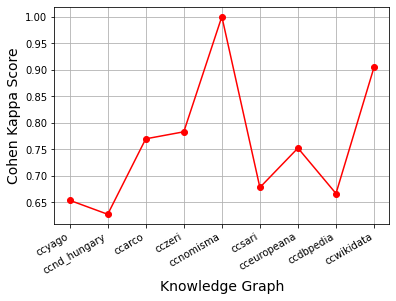

In [164]:
import matplotlib.pyplot as plt
import numpy as np
   
names = list(cohen_kappa_scores.keys())
names = [name.replace("column_completeness_", "cc") for name in names]
scores = list(cohen_kappa_scores.values())

plt.plot(names, scores, color='red', marker='o')
ax = plt.subplot()
plt.xlabel('Knowledge Graph', fontsize=14)
plt.ylabel('Cohen Kappa Score', fontsize=14)
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.grid(True)
plt.show()